<a href="https://colab.research.google.com/github/shellgav/Analisis_ventas/blob/main/Copia_de_Copia_de_FEATURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ÁNALISIS DE VENTAS HISTÓRICAS*** 📈

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
### INFORME EXPLORATORIO ###

# Instalar ydata-profiling
!pip install ydata-profiling -q

# Importar las librerías
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Leer el archivo csv
df = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de Features data set.csv")

# Mostrar información básica del DataFrame
print(df)
df.info()

# Generar el informe de perfil
report = ProfileReport(df, sort=None, html={'style': {'full_width': True}})
report

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [ ]:
# Leer archivos csv's
features= pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de Features data set.csv")
sales = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de sales data-set.csv")
stores = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de stores data-set.csv")

***INFORMACIÓN DE DATAFRAMES***

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


***LIMPIEZA DE DATOS***

In [ ]:
# Modificación del formato de la variable "Date" como corresponde
sales['Date']=pd.to_datetime(sales['Date'], format='%d/%m/%Y') # DataFrame "Sales"
sales['Date'] = pd.to_datetime(sales['Date'])

features['Date']=pd.to_datetime(sales['Date'], format='%d/%m/%Y')  # DataFrame "Features"
features['Date'] = pd.to_datetime(sales['Date'])

In [ ]:
# Asignación del número de semana correspondiente a cada fecha en el DataFrame "Features"
features['Week'] = (features['Date'] - features['Date'].min()).dt.days // 7 + 1
features.head(5)

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Week  
0        NaN        NaN  211.096358         8.106      False     1  
1        NaN        NaN  211.242170         8.106       True     2  
2        NaN        NaN  211.289143         8.106      False     3  
3        NaN        NaN  211.319643         8.106      False     4  
4        NaN        NaN  211.350143         8.106      False     5

In [ ]:
# Eliminar todos los registros con fecha posterior al "2012-10-26", ya que las ventas solo están registradas hasta esa fecha.
features = features.drop(features[features['Date'] > '2012-10-26'].index)  # DataFrame "Features"
features.tail()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
8185     45 2012-01-20        76.05       3.639    4842.29     975.03   
8186     45 2012-01-27        77.50       3.614    9090.48    2268.58   
8187     45 2012-02-03        79.37       3.614    3789.94    1827.31   
8188     45 2012-02-10        82.84       3.737    2961.49    1047.07   
8189     45 2012-02-17        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment  IsHoliday  Week  
8185       3.00    2449.97    3169.69  NaN           NaN      False   103  
8186     582.74    5797.47    1514.93  NaN           NaN      False   104  
8187      85.72     744.84    2150.36  NaN           NaN      False   105  
8188     204.19     363.00    1059.46  NaN           NaN      False   106  
8189       2.06      10.88    1864.57  NaN           NaN      False   107

JOIN DE DATAFRAMES **CORRESPONDIENTES**

In [ ]:
# Primer Merge: Fusionar df_sales con df_features
df_temp = pd.merge(sales, features, on=['Store', 'Date'], how='left')

# Segundo Merge: Fusionar el resultado anterior con df_store
df_join = pd.merge(df_temp, stores, on='Store', how='left')

# Verificar el DataFrame fusionado
df_join.head()  # Muestra las primeras 5 filas
#df_join.info()

Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-05      24924.50        False        55.32       3.386   
2      1     1 2010-02-12      46039.49         True        38.51       2.548   
3      1     1 2010-02-12      46039.49         True        61.24       3.314   
4      1     1 2010-02-19      41595.55        False        39.93       2.514   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1    6766.44    5147.70      50.82    3639.90    2737.42  223.462779   
2        NaN        NaN        NaN        NaN        NaN  211.242170   
3   11421.32    3370.89      40.28    4646.79    6154.16  223.481307   
4        NaN        NaN        NaN        NaN        NaN  211.289143   

   Unemployment IsHoliday_y  Week    Year Type    Size  
0         8.106       False   1.0  2010.0    A  151315  
1         6.573       False   1.0  2010.0    A  151315  
2         8.106        True   2.0  2010.0    A  151315  
3         6.573       False   2.0  2010.0    A  151315  
4         8.106       False   3.0  2010.0    A  151315

In [ ]:
# rellenamos los na con 0 borramos los nulos
df_join['MarkDown1'].fillna(0, inplace=True)
df_join['MarkDown2'].fillna(0, inplace=True)
df_join['MarkDown3'].fillna(0, inplace=True)
df_join['MarkDown4'].fillna(0, inplace=True)
df_join['MarkDown5'].fillna(0, inplace=True)

df_join.head()

Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-05      24924.50        False        55.32       3.386   
2      1     1 2010-02-12      46039.49         True        38.51       2.548   
3      1     1 2010-02-12      46039.49         True        61.24       3.314   
4      1     1 2010-02-19      41595.55        False        39.93       2.514   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0       0.00       0.00       0.00       0.00       0.00  211.096358   
1    6766.44    5147.70      50.82    3639.90    2737.42  223.462779   
2       0.00       0.00       0.00       0.00       0.00  211.242170   
3   11421.32    3370.89      40.28    4646.79    6154.16  223.481307   
4       0.00       0.00       0.00       0.00       0.00  211.289143   

   Unemployment IsHoliday_y  Week    Year Type    Size  
0         8.106       False   1.0  2010.0    A  151315  
1         6.573       False   1.0  2010.0    A  151315  
2         8.106        True   2.0  2010.0    A  151315  
3         6.573       False   2.0  2010.0    A  151315  
4         8.106       False   3.0  2010.0    A  151315

***VISUALIZACIÓN DE DATOS DEL DATAFRAME "FEATURES"***

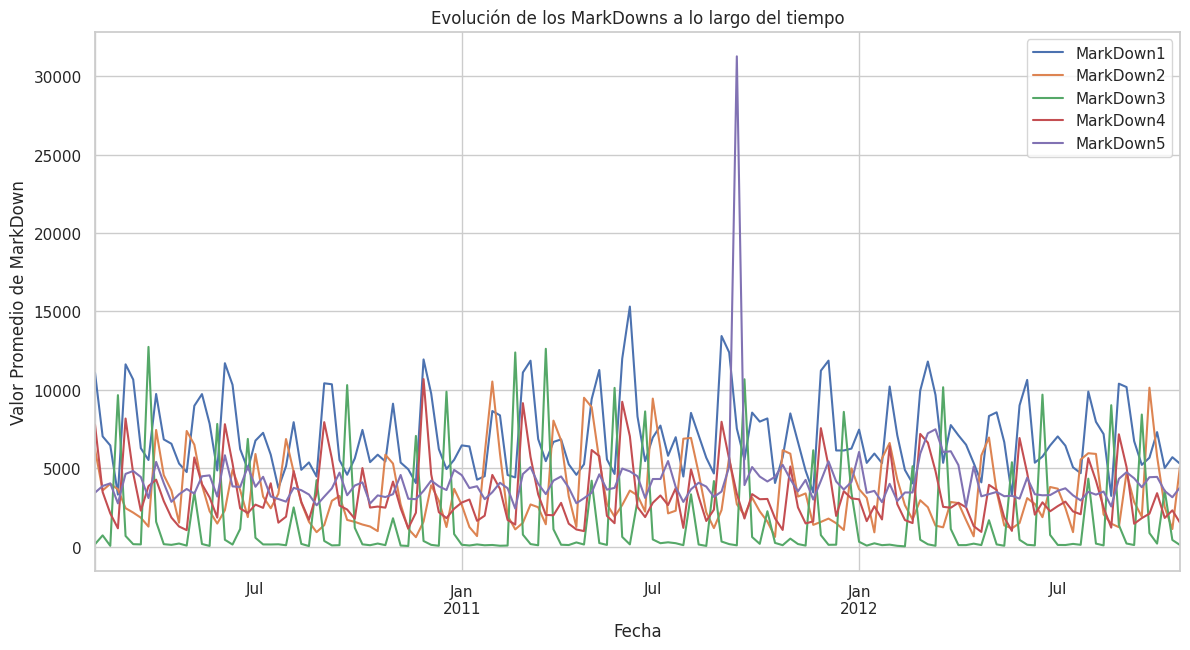

In [ ]:
# Configuración general de los gráficos
sns.set(style="whitegrid")

# Extraer el año para facilitar la comparación anual
features['Year'] = features['Date'].dt.year

# 1. Evolución de los descuentos a lo largo del tiempo
plt.figure(figsize=(14, 7))
features.groupby('Date').mean()[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(ax=plt.gca())
plt.title('Evolución de los MarkDowns a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio de MarkDown')
plt.legend(loc='upper right')
plt.show()

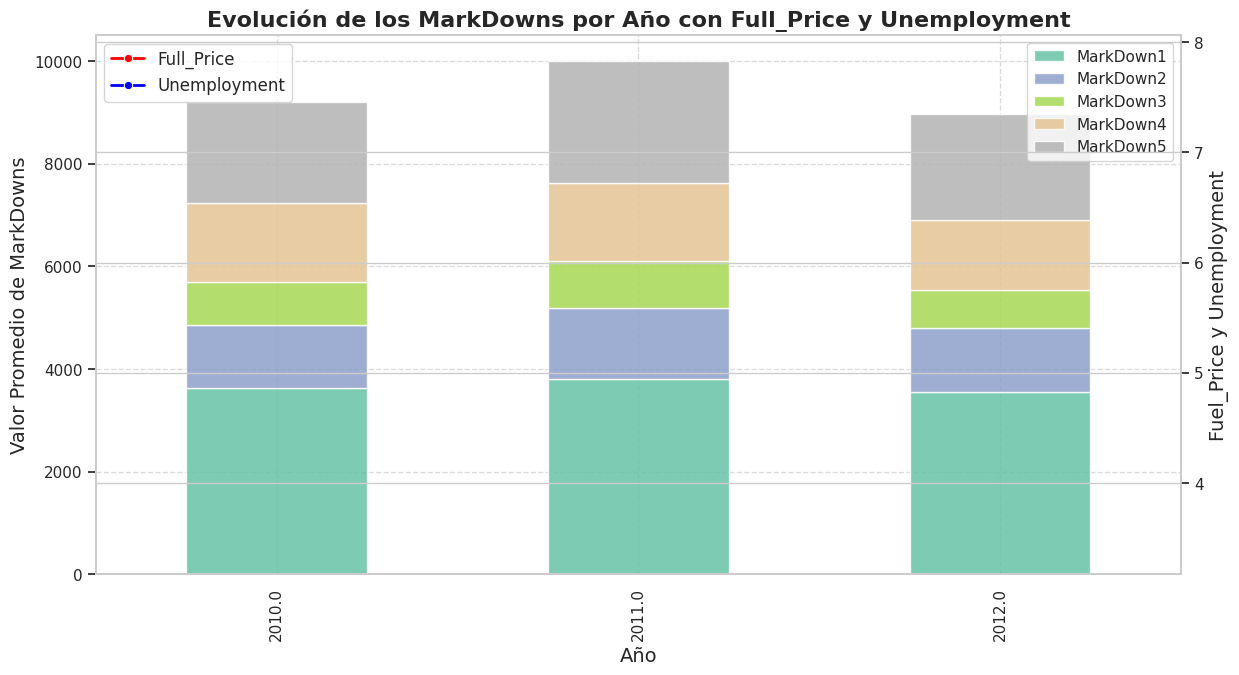

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configuración general de los gráficos
sns.set(style="whitegrid")

# Asegúrate de que las columnas relevantes sean numéricas
numeric_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Fuel_Price', 'Unemployment']
df_join[numeric_columns] = df_join[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Agrupar los datos por año y calcular la media de las columnas numéricas
data = df_join.groupby('Year')[numeric_columns].mean()

# Crear la figura y el gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar las barras apiladas para los MarkDowns
data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(kind='bar', stacked=True, ax=ax1, colormap='Set2', alpha=0.85)
ax1.set_xlabel('Año', fontsize=14)
ax1.set_ylabel('Valor Promedio de MarkDowns', fontsize=14)
ax1.set_title('Evolución de los MarkDowns por Año con Full_Price y Unemployment', fontsize=16, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para graficar Full_Price y Unemployment
ax2 = ax1.twinx()

# Graficar Full_Price con una línea roja
sns.lineplot(data=data['Fuel_Price'], marker='o', sort=False, ax=ax2, color='red', linewidth=2, label='Full_Price')

# Graficar Unemployment con una línea azul
sns.lineplot(data=data['Unemployment'], marker='o', sort=False, ax=ax2, color='blue', linewidth=2, label='Unemployment')

# Ajustar el eje Y del segundo gráfico
ax2.set_ylabel('Fuel_Price y Unemployment', fontsize=14)
ax2.legend(loc='upper left', fontsize=12)

plt.show()





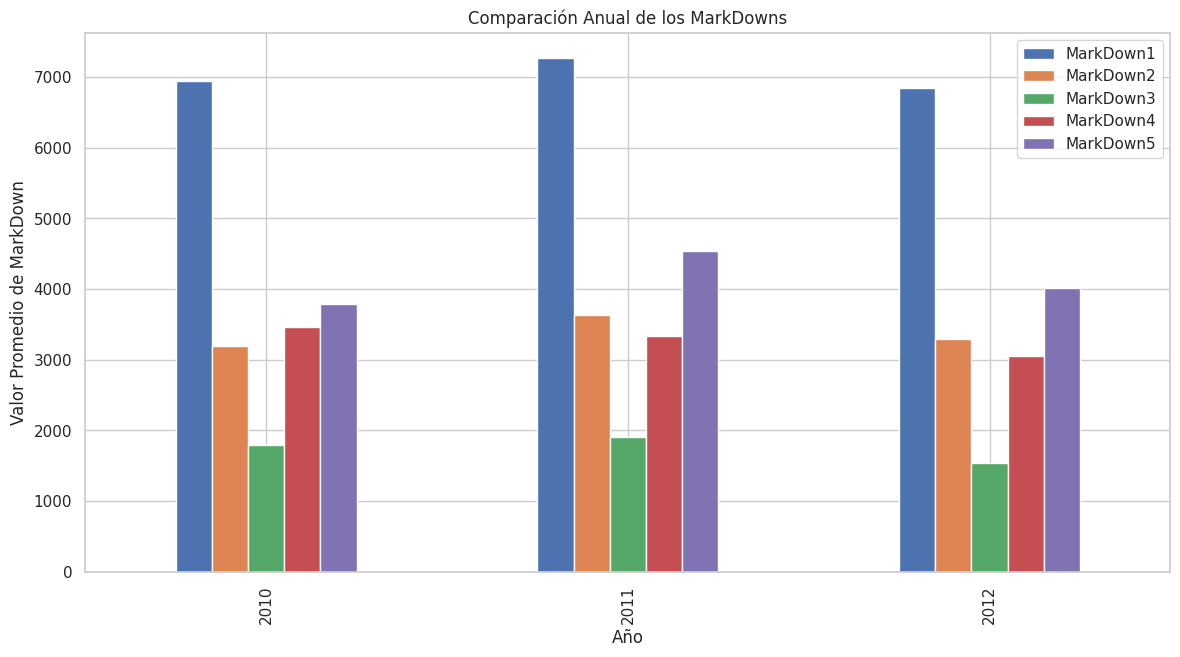

In [ ]:
# 2. Comparación de los descuentos entre años
plt.figure(figsize=(14, 7))
features.groupby('Year').mean()[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(kind='bar', ax=plt.gca())
plt.title('Comparación Anual de los MarkDowns')
plt.xlabel('Año')
plt.ylabel('Valor Promedio de MarkDown')
plt.legend(loc='upper right')
plt.show()

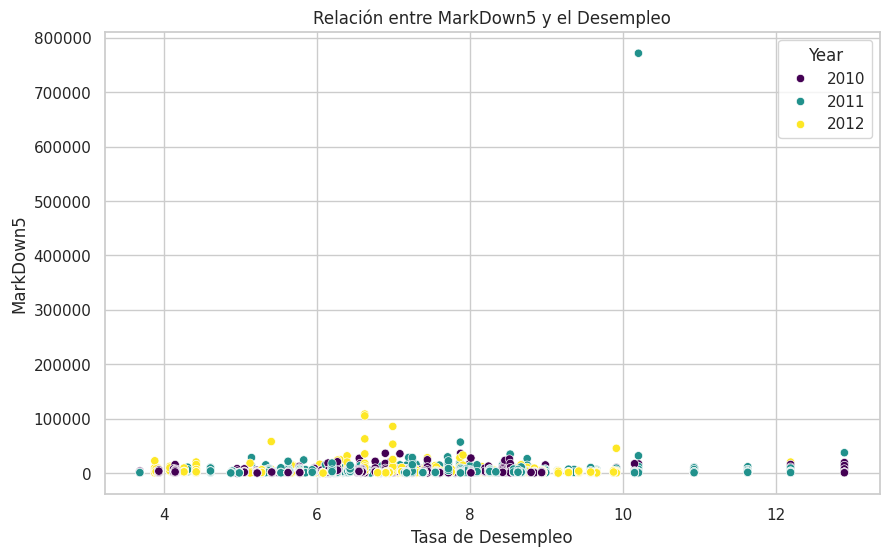

In [ ]:
# 3. Relación entre MarkDown5 y el desempleo
plt.figure(figsize=(10, 6))
sns.scatterplot(data = features, x='Unemployment', y='MarkDown5', hue='Year', palette='viridis')
plt.title('Relación entre MarkDown5 y el Desempleo')
plt.xlabel('Tasa de Desempleo')
plt.ylabel('MarkDown5')
plt.show()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

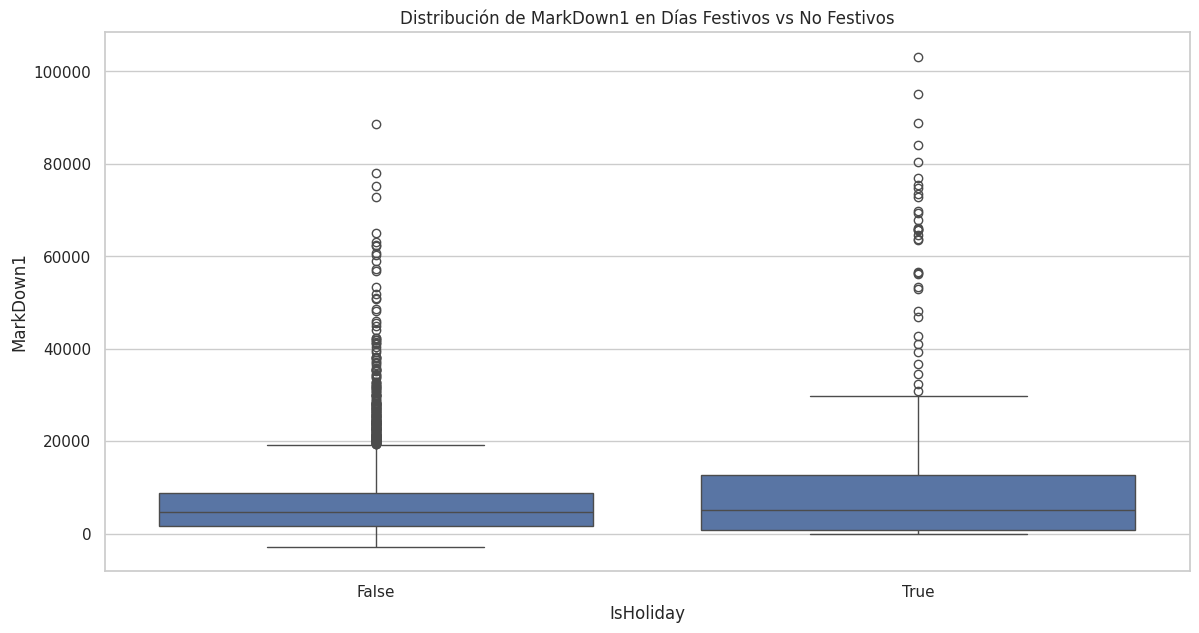

In [ ]:
# 4. Distribución de MarkDowns durante los días festivos
plt.figure(figsize=(14, 7))
sns.boxplot(data = features, x='IsHoliday', y='MarkDown1')
plt.title('Distribución de MarkDown1 en Días Festivos vs No Festivos')
plt.xlabel

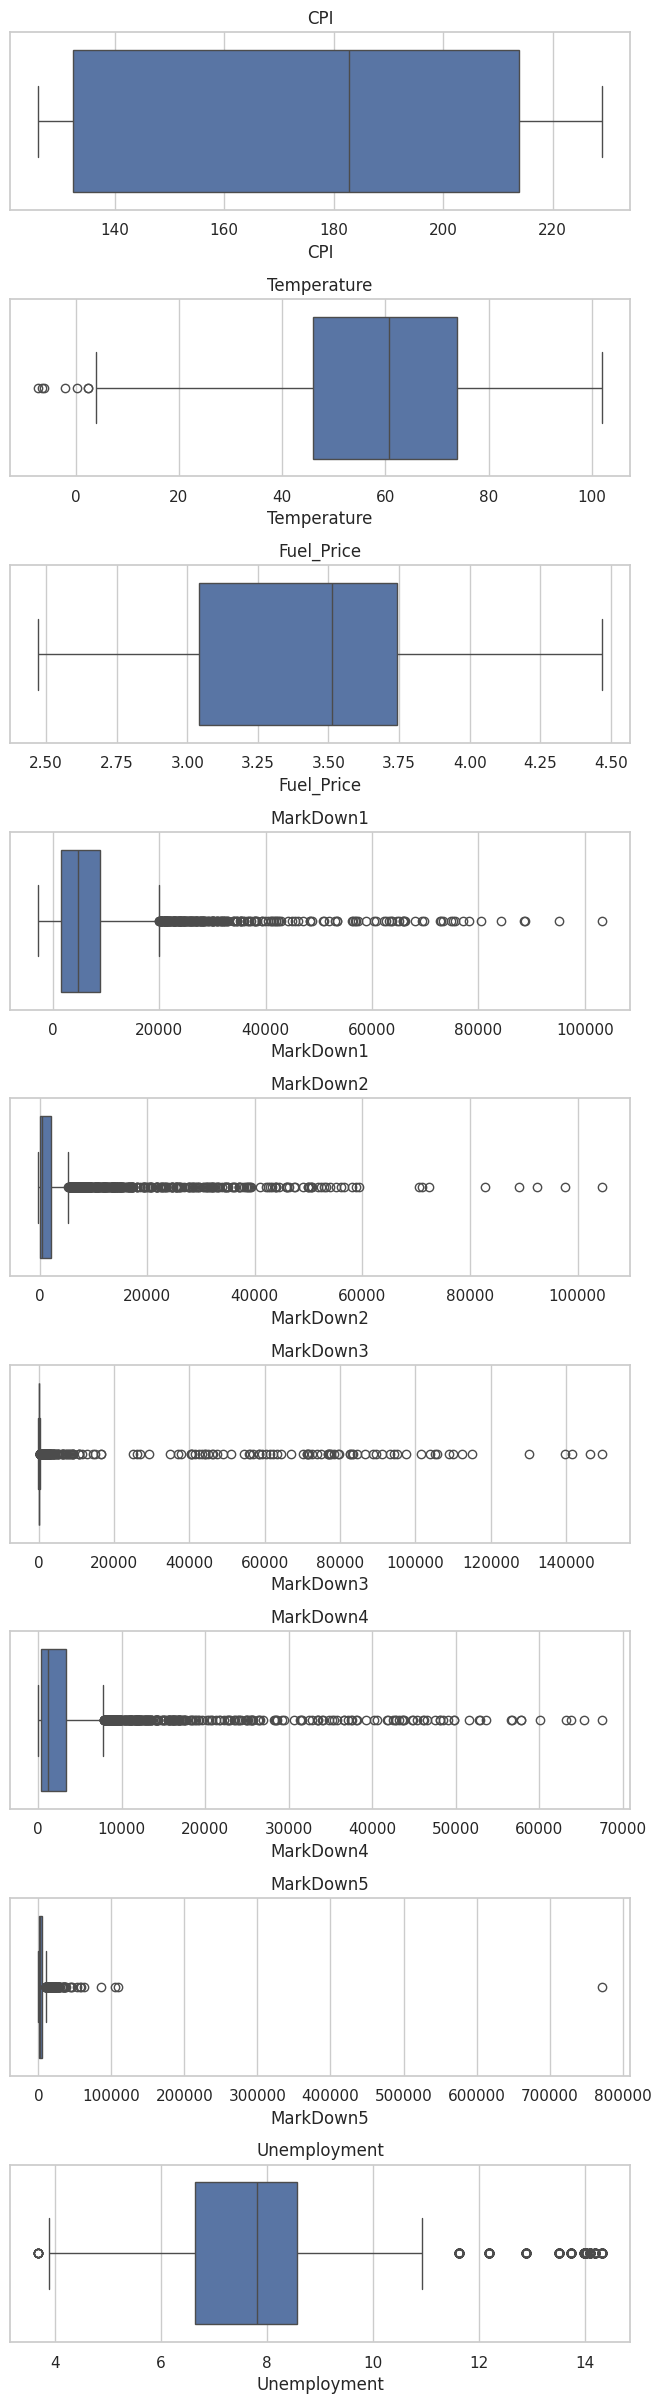

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['CPI', 'Temperature', 'Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Unemployment']

fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=features, ax=ax[i])
    ax[i].set_title(col)

***JOIN DE DATAFRAMES CORRESPONDIENTES***



In [ ]:
# Primer Merge: Fusionar df_sales con df_features
df_temp = pd.merge(sales, features, on=['Store', 'Date'], how='left')

# Segundo Merge: Fusionar el resultado anterior con df_store
df_join = pd.merge(df_temp, stores, on='Store', how='left')

# Verificar el DataFrame fusionado
df_join.head()  # Muestra las primeras 5 filas
#df_join.info()


In [ ]:
df_join.dtypes

In [ ]:
# rellenamos los na con 0 borramos los nulos
df_join['MarkDown1'].fillna(0, inplace=True)
df_join['MarkDown2'].fillna(0, inplace=True)
df_join['MarkDown3'].fillna(0, inplace=True)
df_join['MarkDown4'].fillna(0, inplace=True)
df_join['MarkDown5'].fillna(0, inplace=True)

df_join.head()

***DESARROLLO DEL MODELO PREDICTIVO***

**modelo predictivo**

# Modelo

In [ ]:
# Selección de columnas relevantes

df_modelo = df_join[["Weekly_Sales", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI","Unemployment","Type", "Week", "Temperature", "Size", "Dept"]]
df_modelo.head()

Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0      24924.50       0.00       0.00       0.00       0.00       0.00   
1      24924.50    6766.44    5147.70      50.82    3639.90    2737.42   
2      46039.49       0.00       0.00       0.00       0.00       0.00   
3      46039.49   11421.32    3370.89      40.28    4646.79    6154.16   
4      41595.55       0.00       0.00       0.00       0.00       0.00   

          CPI  Unemployment Type  Week  Temperature    Size  Dept  
0  211.096358         8.106    A   1.0        42.31  151315     1  
1  223.462779         6.573    A   1.0        55.32  151315     1  
2  211.242170         8.106    A   2.0        38.51  151315     1  
3  223.481307         6.573    A   2.0        61.24  151315     1  
4  211.289143         8.106    A   3.0        39.93  151315     1

In [ ]:
#borrando los nulos
df_modelo.dropna(inplace=True)
#df_modelo.info()

<ipython-input-85-46188af0f4f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo.dropna(inplace=True)


In [ ]:
df_modelo = pd.get_dummies(df_modelo, columns=['Type'], drop_first=True)
df_modelo.head()

Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0      24924.50       0.00       0.00       0.00       0.00       0.00   
1      24924.50    6766.44    5147.70      50.82    3639.90    2737.42   
2      46039.49       0.00       0.00       0.00       0.00       0.00   
3      46039.49   11421.32    3370.89      40.28    4646.79    6154.16   
4      41595.55       0.00       0.00       0.00       0.00       0.00   

          CPI  Unemployment  Week  Temperature    Size  Dept  Type_B  Type_C  
0  211.096358         8.106   1.0        42.31  151315     1   False   False  
1  223.462779         6.573   1.0        55.32  151315     1   False   False  
2  211.242170         8.106   2.0        38.51  151315     1   False   False  
3  223.481307         6.573   2.0        61.24  151315     1   False   False  
4  211.289143         8.106   3.0        39.93  151315     1   False   False

In [ ]:
y  = df_modelo["Weekly_Sales"] # Variable Dependiente
X = df_modelo.drop("Weekly_Sales", axis = 1) # Variables Independiente

In [ ]:
# División del Dataset en Conjunto de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenamiento de un Modelo Simple
model = LinearRegression()  # Usa LinearRegression en lugar de LogisticRegression
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Entrenar nuestro modelo
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# poner a pruba el modelo creado
y_pred_train = model.predict(X_train)
print(y_pred_train[:5])

[23039.15044387 13124.3373116   4679.07674714 22691.29643225
 10299.81235973]


In [ ]:
# poner a pruba el modelo creado
y_pred_train = model.predict(X_train)
print(y_pred_train[:5])

[23039.15044387 13124.3373116   4679.07674714 22691.29643225
 10299.81235973]


In [ ]:
# Mean squared error (MSE )
print (f'MSE: {mean_squared_error(y_train, y_pred_train)}')

# RMSE
print (f'RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')

# MAE
print (f'MAE: {mean_absolute_error(y_train, y_pred_train)}')

# R2
print (f'R2: {r2_score(y_train, y_pred_train)}')

MSE: 471778455.7083632
RMSE: 21720.461682670633
MAE: 14628.239813825276
R2: 0.08477634940823786
